# Import Libraries

In [1]:
#Import Libraries
import glob
from keras.models import Sequential, load_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Loading the Dataset:

In [2]:
train = pd.read_csv('../input/kidney_disease.csv')
train.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Data Preprocessing
### Graph Showing Missing Values in Patients Data

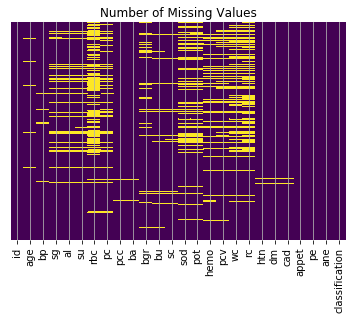

In [3]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.grid()
plt.title("Number of Missing Values")
plt.savefig('missing.png')

### Getting rid of ALL ROWS with Nans

In [4]:
for i in ['rc','wc','pcv']:
    train[i] = train[i].str.extract('(\d+)').astype(float)
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    train[i].fillna(train[i].mean(),inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


## Data Visualization
### Plot showing RBC count (normal/ abnormal)

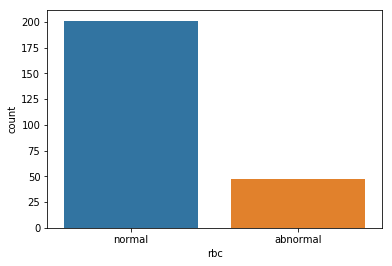

In [5]:
sns.countplot(data=train,x='rbc')
train['rbc'].fillna('normal',inplace=True)

### Plot showing Protein C (normal/ abnormal)

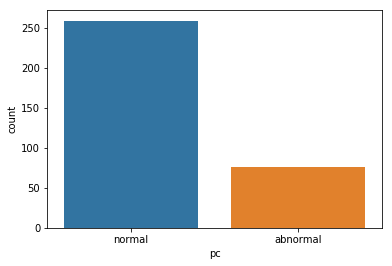

In [6]:
sns.countplot(data=train,x='pc')
train['pc'].fillna('normal',inplace=True)

### Plot showing Prothrombin complex concentrate (present/ not present)

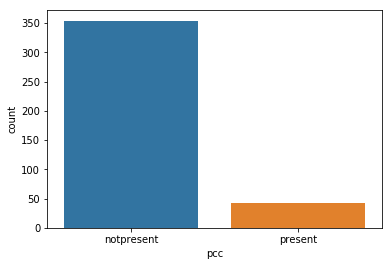

In [7]:
sns.countplot(data=train,x='pcc')
train['pcc'].fillna('notpresent',inplace=True)

### Plot showing count of patients having Hypertension

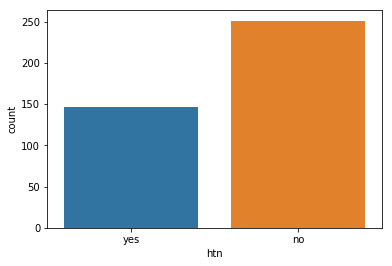

In [8]:
sns.countplot(data=train,x='htn')
train['htn'].fillna('no',inplace=True)

### Plot showing count of patients with Diabetes Mellitus

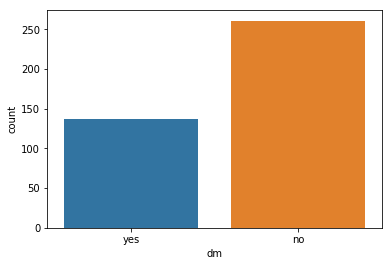

In [9]:
train['dm'] = train['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
sns.countplot(data=train,x='dm')
train['dm'].fillna('no',inplace=True)

### Plot Showing count of Coronary Artery Disease

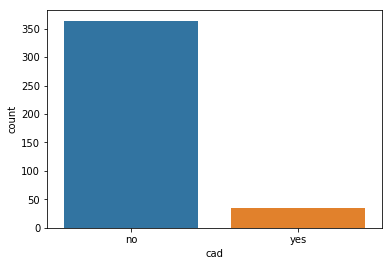

In [10]:
train['cad'] = train['cad'].replace(to_replace='\tno',value='no')
sns.countplot(data=train,x='cad')
train['cad'].fillna('no',inplace=True)

In [11]:
train['appet'].fillna('good',inplace=True)
train['pe'].fillna('no',inplace=True)
train['ane'].fillna('no',inplace=True)
train['ba'].fillna('notpresent',inplace=True)

train['cad'] = train['cad'].replace(to_replace='ckd\t',value='ckd')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               400 non-null float64
bp                400 non-null float64
sg                400 non-null float64
al                400 non-null float64
su                400 non-null float64
rbc               400 non-null object
pc                400 non-null object
pcc               400 non-null object
ba                400 non-null object
bgr               400 non-null float64
bu                400 non-null float64
sc                400 non-null float64
sod               400 non-null float64
pot               400 non-null float64
hemo              400 non-null float64
pcv               400 non-null float64
wc                400 non-null float64
rc                400 non-null float64
htn               400 non-null object
dm                400 non-null object
cad               400 non-null object
appet             400 non-null object
pe      

### We can see there are no missing values now as we have filled every missing data.

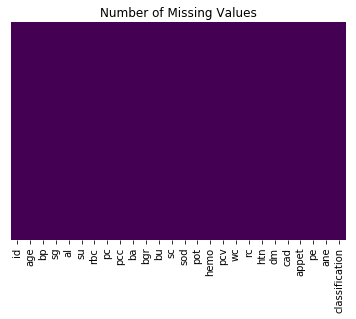

In [12]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Number of Missing Values")
plt.savefig('missing_updated.png')

In [13]:
from sklearn.preprocessing import LabelEncoder

for i in ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification']:
    train[i] = LabelEncoder().fit_transform(train[i])

In [14]:
from sklearn.preprocessing import MinMaxScaler

for i in train.columns:
    train[i] = MinMaxScaler().fit_transform(train[i].astype(float).values.reshape(-1, 1))

In [15]:
X = train.drop(['id','classification'],axis=1)
Y = train['classification']

### Model

In [16]:
model = Sequential()

model.add(Dense(100,input_dim=X.shape[1],activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history = model.fit(X,Y,epochs=50,batch_size=40,validation_split=.2,verbose=2)

Train on 320 samples, validate on 80 samples
Epoch 1/50
 - 0s - loss: 0.5788 - acc: 0.7656 - val_loss: 1.0298 - val_acc: 0.0000e+00
Epoch 2/50
 - 0s - loss: 0.4663 - acc: 0.7750 - val_loss: 1.1574 - val_acc: 0.0000e+00
Epoch 3/50
 - 0s - loss: 0.3951 - acc: 0.7750 - val_loss: 1.0556 - val_acc: 0.0000e+00
Epoch 4/50
 - 0s - loss: 0.3312 - acc: 0.7750 - val_loss: 0.8539 - val_acc: 0.0000e+00
Epoch 5/50
 - 0s - loss: 0.2770 - acc: 0.7750 - val_loss: 0.7313 - val_acc: 0.1625
Epoch 6/50
 - 0s - loss: 0.2395 - acc: 0.8969 - val_loss: 0.6257 - val_acc: 0.9250
Epoch 7/50
 - 0s - loss: 0.2104 - acc: 0.9781 - val_loss: 0.5270 - val_acc: 0.9875
Epoch 8/50
 - 0s - loss: 0.1849 - acc: 0.9844 - val_loss: 0.4554 - val_acc: 0.9875
Epoch 9/50
 - 0s - loss: 0.1625 - acc: 0.9781 - val_loss: 0.3427 - val_acc: 1.0000
Epoch 10/50
 - 0s - loss: 0.1422 - acc: 0.9781 - val_loss: 0.2546 - val_acc: 1.0000
Epoch 11/50
 - 0s - loss: 0.1275 - acc: 0.9781 - val_loss: 0.1824 - val_acc: 1.0000
Epoch 12/50
 - 0s - loss

### Plot showing Model Accuracy

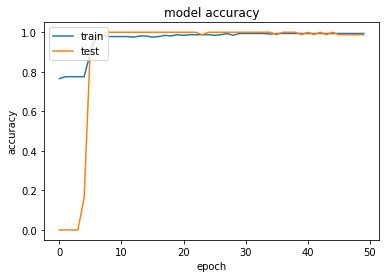

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Plot showing Model Loss

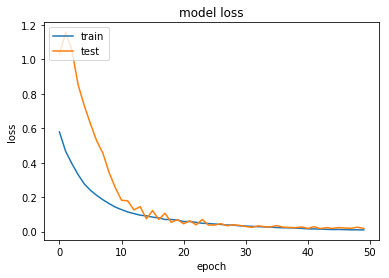

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Getting Accuracy of 99.25% from our model.

In [20]:
scores = model.evaluate(X,Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

400/400 [==============================] - 0s 34us/step

acc: 99.25%
